In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [38]:
from sklearn.datasets import load_wine
vine = load_wine()
df = pd.DataFrame(vine.data, columns=vine.feature_names)
df.head()
df.shape
df.isnull().sum().sum()
X1 = df
y1 = pd.Series(vine.target)

In [39]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X1,y1,test_size=0.20,shuffle=True, random_state=2)

In [40]:
from keras.models import Sequential

ann = Sequential()

In [41]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer

ann.add(InputLayer(input_shape=(13,)))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(14, activation='relu'))
ann.add(Dense(13, activation='softmax'))

In [42]:
from tensorflow.keras import optimizers

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
ann.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

clf = ann.fit(X2_train, y2_train, batch_size=8, verbose=2, epochs=100, validation_data=(X2_test, y2_test))

Epoch 1/100
18/18 - 1s - loss: 8.4199 - accuracy: 0.2465 - val_loss: 1.8487 - val_accuracy: 0.2500 - 617ms/epoch - 34ms/step
Epoch 2/100
18/18 - 0s - loss: 1.3922 - accuracy: 0.4155 - val_loss: 0.8544 - val_accuracy: 0.5278 - 49ms/epoch - 3ms/step
Epoch 3/100
18/18 - 0s - loss: 1.1372 - accuracy: 0.4859 - val_loss: 1.4006 - val_accuracy: 0.2500 - 43ms/epoch - 2ms/step
Epoch 4/100
18/18 - 0s - loss: 0.9654 - accuracy: 0.5845 - val_loss: 0.8420 - val_accuracy: 0.6389 - 42ms/epoch - 2ms/step
Epoch 5/100
18/18 - 0s - loss: 0.9536 - accuracy: 0.5423 - val_loss: 0.6556 - val_accuracy: 0.7222 - 44ms/epoch - 2ms/step
Epoch 6/100
18/18 - 0s - loss: 0.9174 - accuracy: 0.6268 - val_loss: 0.6845 - val_accuracy: 0.6944 - 42ms/epoch - 2ms/step
Epoch 7/100
18/18 - 0s - loss: 0.8379 - accuracy: 0.6620 - val_loss: 1.1134 - val_accuracy: 0.5278 - 45ms/epoch - 2ms/step
Epoch 8/100
18/18 - 0s - loss: 0.8382 - accuracy: 0.6197 - val_loss: 0.6727 - val_accuracy: 0.7500 - 45ms/epoch - 2ms/step
Epoch 9/100
18

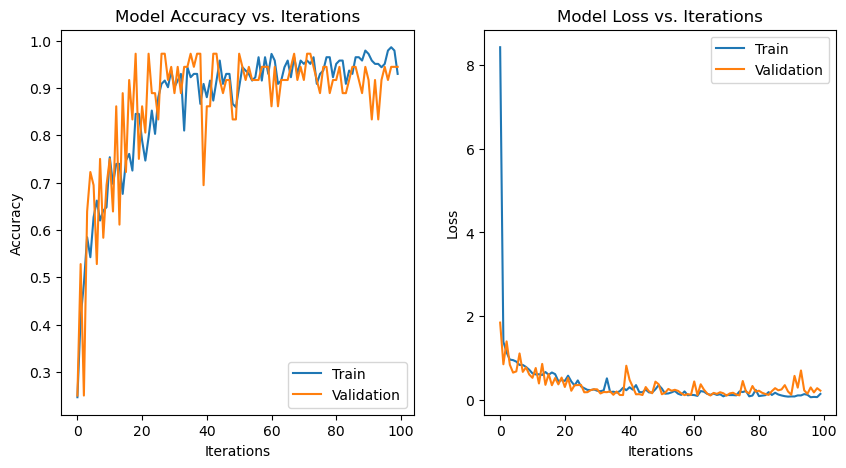

In [45]:
import matplotlib.pyplot as plt

figures, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(clf.history['accuracy'])
axes[0].plot(clf.history['val_accuracy'])
axes[0].set_title('Model Accuracy vs. Iterations')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Iterations')
axes[0].legend(['Train', 'Validation'], loc='lower right')

axes[1].plot(clf.history['loss'])
axes[1].plot(clf.history['val_loss'])
axes[1].set_title('Model Loss vs. Iterations')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Iterations')
axes[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()